# Supply Chain Analysis Case Study
####  By Zach Richardson
#### 10/24/23


## <u>Ask</u>

### Case Study Description
Jack's Cosmetics Company is growing quickly and is looking to use data insights to improve their business. The company has collected data from the supply chain from the past 3 months to use for analysis. My task is to dive into the collected data to identify patterns and devise solutions that can improve the company's supply chain operations, enhance efficiency, and improve customer satisfaction.

### Questions To Be Answered
* What patterns exist in the data?
* How can supply chain processes be improved?
* How can customer satisfaction be improved?
* How can costs be minimized?

### Deliverables
* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of your analysis
* Supporting Viz and key findings
* High level recommendations

## <u>Prepare</u>

### Data Source
https://www.kaggle.com/datasets/dorothyjoel/us-regional-sales

### Data Description
This data set was collected and provided by Jack's Cosmetics Company, providing information on the products sold alongside the details of their manufacturing and shipping. Products are divided into three categories, haircare, cosmetics, and skincare. Manufacturing is done by three suppliers. Data is largely qualitative and discrete, comprised of details for 100 products. This data is aggregated across 3 months and was collected first-hand by the company. Analysis of this data set will allow Jack's Cosmetics to improve the supply chain by decreasing costs, increasing effeciency, and maximizing customer satisfaction. 

The following fields are provided in the data set:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Jacks.csv")
df.columns.tolist()

['Product type',
 'SKU',
 'Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Customer demographics',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping carriers',
 'Shipping costs',
 'Supplier name',
 'Location',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Inspection results',
 'Defect rates',
 'Transportation modes',
 'Routes',
 'Costs']

### Data Quality Evaluation
* Reliable - HIGH - The data is first-party, collected internally by the company
* Original - HIGH - The data is specific to Jack's Cosmetics
* Current - HIGH - Most recent supply chain data from the last 3 months
* Comprehensive - MED - Data set is comprised of 100 items across 3 months
* Cited - LOW - No evidence of citation

### Data Limitations

* Comprised of only 100 items
* Data is limited to 3-month span
* Data is collected first-party, lacking citation
* Data lacks documentation
* Some column names are ambiguous, ex: two columns labeled lead time

## <u>Process</u>

### Data Cleaning

#### Standardize Column Names

In [2]:
df.columns = df.columns.str.title()
df.columns = df.columns.str.strip()

#### Remove Leading/Trailing Whitespaces

In [3]:
strings = df.select_dtypes("object")
strings.apply(lambda x : x.str.strip())

,Product Type,Sku,Customer Demographics,Shipping Carriers,Supplier Name,Location,Inspection Results,Transportation Modes,Routes
0,haircare,SKU0,Non-binary,Carrier B,Supplier 3,Mumbai,Pending,Road,Route B
1,skincare,SKU1,Female,Carrier A,Supplier 3,Mumbai,Pending,Road,Route B
2,haircare,SKU2,Unknown,Carrier B,Supplier 1,Mumbai,Pending,Air,Route C
3,skincare,SKU3,Non-binary,Carrier C,Supplier 5,Kolkata,Fail,Rail,Route A
4,skincare,SKU4,Non-binary,Carrier A,Supplier 1,Delhi,Fail,Air,Route A
...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,Unknown,Carrier B,Supplier 4,Mumbai,Pending,Air,Route A
96,cosmetics,SKU96,Non-binary,Carrier C,Supplier 3,Mumbai,Pending,Road,Route A
97,haircare,SKU97,Male,Carrier A,Supplier 4,Mumbai,Fail,Road,Route A
98,skincare,SKU98,Female,Carrier B,Supplier 5,Chennai,Pending,Rail,Route A


#### Formatting Data

In [4]:
df.head(3)
df.info()
df.value_counts()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Type             100 non-null    object 
 1   Sku                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number Of Products Sold  100 non-null    int64  
 5   Revenue Generated        100 non-null    float64
 6   Customer Demographics    100 non-null    object 
 7   Stock Levels             100 non-null    int64  
 8   Lead Times               100 non-null    int64  
 9   Order Quantities         100 non-null    int64  
 10  Shipping Times           100 non-null    int64  
 11  Shipping Carriers        100 non-null    object 
 12  Shipping Costs           100 non-null    float64
 13  Supplier Name            100 non-null    object 
 14  Location                 10

Product Type                 3
Sku                        100
Price                      100
Availability                63
Number Of Products Sold     96
Revenue Generated          100
Customer Demographics        4
Stock Levels                65
Lead Times                  29
Order Quantities            61
Shipping Times              10
Shipping Carriers            3
Shipping Costs             100
Supplier Name                5
Location                     5
Lead Time                   29
Production Volumes          96
Manufacturing Lead Time     30
Manufacturing Costs        100
Inspection Results           3
Defect Rates               100
Transportation Modes         4
Routes                       3
Costs                      100
dtype: int64

In [5]:
df[["Product Type", "Customer Demographics", "Shipping Carriers", "Supplier Name", "Location", "Inspection Results", "Transportation Modes", "Routes"]] = df[["Product Type", "Customer Demographics", "Shipping Carriers", "Supplier Name", "Location", "Inspection Results", "Transportation Modes", "Routes"]].astype("category")

#### Check For Duplicates

In [6]:
df[df.duplicated()]

,Product Type,Sku,Price,Availability,Number Of Products Sold,Revenue Generated,Customer Demographics,Stock Levels,Lead Times,Order Quantities,...,Location,Lead Time,Production Volumes,Manufacturing Lead Time,Manufacturing Costs,Inspection Results,Defect Rates,Transportation Modes,Routes,Costs


#### Check for Nulls

In [7]:
df.isnull().sum()

Product Type               0
Sku                        0
Price                      0
Availability               0
Number Of Products Sold    0
Revenue Generated          0
Customer Demographics      0
Stock Levels               0
Lead Times                 0
Order Quantities           0
Shipping Times             0
Shipping Carriers          0
Shipping Costs             0
Supplier Name              0
Location                   0
Lead Time                  0
Production Volumes         0
Manufacturing Lead Time    0
Manufacturing Costs        0
Inspection Results         0
Defect Rates               0
Transportation Modes       0
Routes                     0
Costs                      0
dtype: int64

#### Calculate Net Income

In [31]:
df["Net Income"] = df["Revenue Generated"] - df["Costs"]
df[["Sku", "Net Income"]]

,Sku,Net Income
0,SKU0,8474.244717
1,SKU1,6957.834486
2,SKU2,9435.829344
3,SKU3,7512.060266
4,SKU4,1763.064520
...,...,...
95,SKU95,6607.499703
96,SKU96,7509.682624
97,SKU97,3830.784157
98,SKU98,7643.753696


#### Calculate Economic Order Quantity

In [30]:
import numpy as np
def calc_eoq (df):
    demand = df["Order Quantities"].astype("float")
    ordering_cost = df["Costs"]
    carrying_cost = df["Costs"]*0.2
    return np.sqrt(((demand * ordering_cost) * 2)/ carrying_cost)

df["Economic Order Quantity"] = calc_eoq(df).round(decimals = 2)
df[["Sku", "Stock Levels", "Economic Order Quantity"]]

,Sku,Stock Levels,Economic Order Quantity
0,SKU0,58,30.98
1,SKU1,53,19.24
2,SKU2,1,29.66
3,SKU3,23,24.29
4,SKU4,5,23.66
...,...,...,...
95,SKU95,15,16.12
96,SKU96,67,17.89
97,SKU97,46,6.32
98,SKU98,53,16.43


## Data Exploration

In [9]:
df.describe()

,Price,Availability,Number Of Products Sold,Revenue Generated,Stock Levels,Lead Times,Order Quantities,Shipping Times,Shipping Costs,Lead Time,Production Volumes,Manufacturing Lead Time,Manufacturing Costs,Defect Rates,Costs,Net Income
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782,5246.802405
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696,2738.004606
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248,749.044249
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455,2328.654225
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444,5410.909666
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231,7670.418727
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450,9435.829344


Text(0.5, 1.0, 'Correlation Matrix')

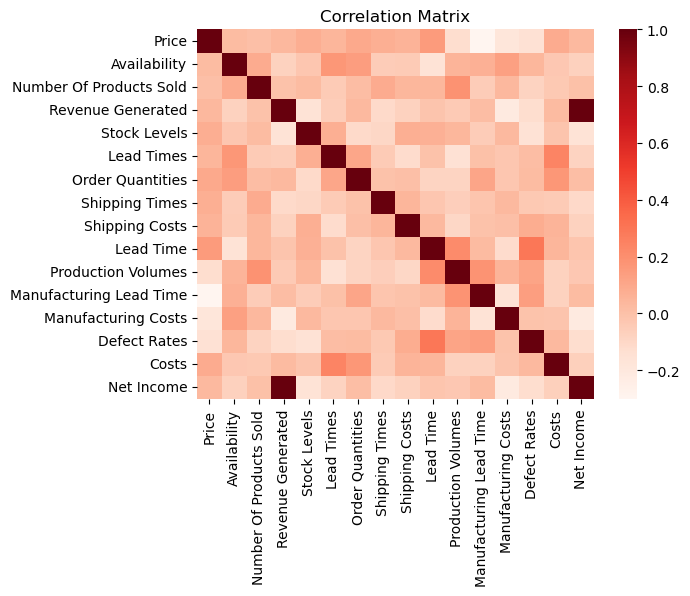

In [10]:
df.corr(numeric_only = True)
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap= "Reds")
plt.title("Correlation Matrix")

## <u>Analyze</u>

### Top Earning Products
Analysis of the top 10 highest revenue products. Half of the group is made up of products from the skincare category. The revenue on these products ranges from \\$9866 to \\$9364. The highest net income product is SKU2, which interestingly only sold 8 items. 

In [11]:
productsSorted = df.sort_values("Revenue Generated", ascending = False)
topProducts = productsSorted[:10]
topProducts.set_index("Sku", inplace = True)
topProducts

,Product Type,Price,Availability,Number Of Products Sold,Revenue Generated,Customer Demographics,Stock Levels,Lead Times,Order Quantities,Shipping Times,...,Lead Time,Production Volumes,Manufacturing Lead Time,Manufacturing Costs,Inspection Results,Defect Rates,Transportation Modes,Routes,Costs,Net Income
Sku,,,,,,,,,,,,,,,,,,,,,
SKU51,haircare,26.700761,61,154,9866.465458,Male,100,4,52,1,...,18,673,28,14.190328,Pending,1.772951,Road,Route A,694.982318,9171.483140
SKU38,cosmetics,52.075931,75,705,9692.318040,Non-binary,69,1,88,5,...,10,841,12,5.930694,Pending,0.613327,Air,Route B,339.672870,9352.645170
SKU31,skincare,50.847393,28,168,9655.135103,Male,6,17,44,4,...,24,461,8,60.251146,Pending,2.989000,Rail,Route C,609.379207,9045.755896
SKU90,skincare,13.881914,56,320,9592.633570,Non-binary,66,18,96,7,...,8,585,8,85.675963,Pass,1.219382,Rail,Route B,990.078473,8602.555098
SKU2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,...,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,9435.829344
SKU32,skincare,79.209936,43,781,9571.550487,Unknown,89,13,64,4,...,30,737,7,29.692467,Pass,1.946036,Road,Route A,761.173910,8810.376578
SKU67,skincare,87.755432,16,513,9473.798033,Unknown,12,9,71,9,...,10,198,11,7.057876,Pass,0.131955,Sea,Route C,169.271801,9304.526231
SKU88,cosmetics,75.270407,58,737,9444.742033,Male,60,18,85,7,...,21,953,11,68.184919,Pending,0.722204,Sea,Route A,103.916248,9340.825785
SKU52,skincare,98.031830,1,820,9435.762609,Male,64,11,11,1,...,10,727,27,9.166849,Pending,2.122472,Air,Route C,602.898499,8832.864110


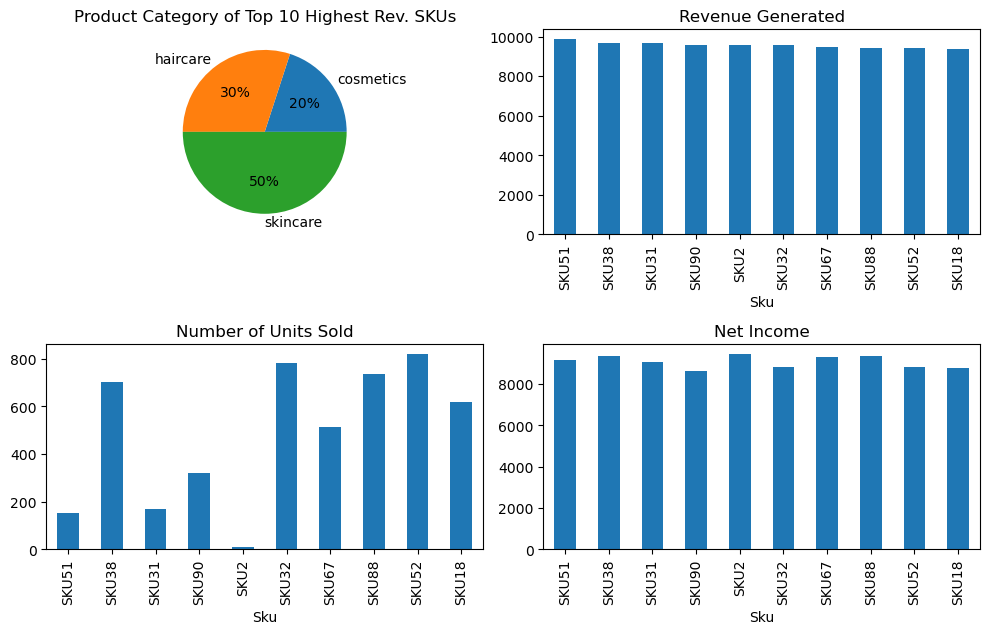

In [12]:
plt.subplot(4,2,1)
topProducts.groupby("Product Type").size().plot(kind = "pie", figsize=(10,12), autopct="%1.0f%%", title = "Product Category of Top 10 Highest Rev. SKUs")
plt.subplot(4,2,2)
topProducts["Revenue Generated"].plot(kind = "bar", title = "Revenue Generated")
plt.subplot(4,2,3)
topProducts["Number Of Products Sold"].plot(kind = "bar", title = "Number of Units Sold")
plt.subplot(4,2,4)
topProducts["Net Income"].plot(kind = "bar", title = "Net Income")
plt.tight_layout()

In [37]:
topProducts["Revenue Generated"]

Sku
SKU51    9866.465458
SKU38    9692.318040
SKU31    9655.135103
SKU90    9592.633570
SKU2     9577.749626
SKU32    9571.550487
SKU67    9473.798033
SKU88    9444.742033
SKU52    9435.762609
SKU18    9364.673505
Name: Revenue Generated, dtype: float64

### Product Categories
Analysis of the 3 product categories of cosmetics, haircare, and skincare. Skincare makes up the largest share of products, also taking up the largest share of the revenue, net income, costs, and units sold. Cosmetics have the smallest share among the group

In [13]:
category = df.groupby(by = "Product Type")
category.size()

Product Type
cosmetics    26
haircare     34
skincare     40
dtype: int64

<Axes: title={'center': 'Number of Products Offered by Category'}>

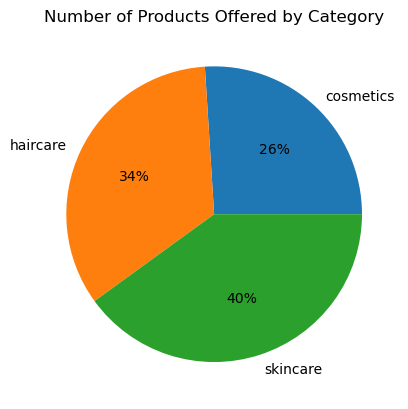

In [14]:
category.size().plot(kind = "pie", title = "Number of Products Offered by Category", autopct='%1.0f%%')

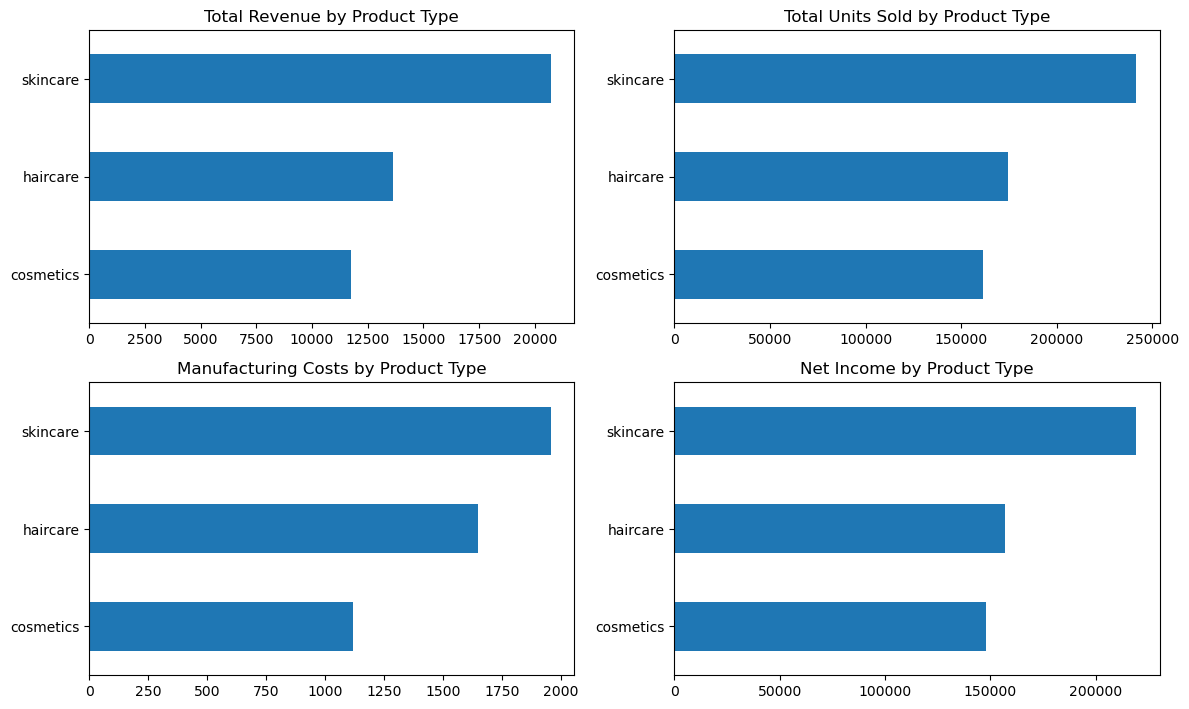

In [15]:
plt.subplot(4, 2, 1)
category["Number Of Products Sold"].sum().plot(kind = "barh", ylabel="", figsize = (12,14), title = "Total Revenue by Product Type")
plt.subplot(4, 2, 2)
category["Revenue Generated"].sum().plot(kind = "barh", ylabel="", title = "Total Units Sold by Product Type")
plt.subplot(4, 2, 3)
category["Manufacturing Costs"].sum().plot(kind = "barh", ylabel="", title = "Manufacturing Costs by Product Type")
plt.subplot(4, 2, 4)
category["Net Income"].sum().plot(kind = "barh", ylabel="", title = "Net Income by Product Type")

plt.tight_layout()

### Transportation and Carriers
Analysis of the transportation methods and carriers. Rail and road are the most common shipping modes, and Carrier B is the most used carrier for the company. The three carriers have similar average costs, but B is faster on average. The fastest shipping method is by road with Carrier C, the cheapest shipping method is by sea with Carrier C. 

In [16]:
transport = df.groupby("Transportation Modes")
carriers = df.groupby("Shipping Carriers")

<Axes: title={'center': 'Shipping by Carrier'}>

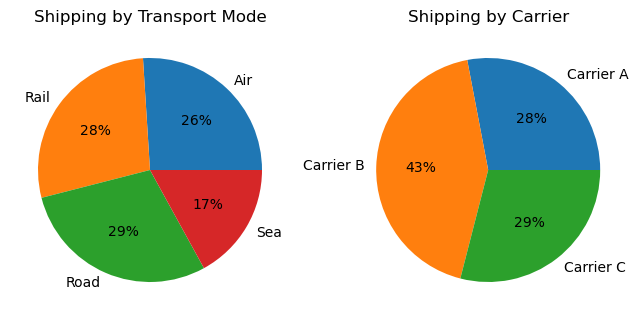

In [17]:
plt.subplot(2,2,1)
transport.size().plot(kind = "pie", title = "Shipping by Transport Mode", autopct='%1.0f%%', figsize=(8,8))
plt.subplot(2,2,2)
carriers.size().plot(kind = "pie", title = "Shipping by Carrier", autopct='%1.0f%%')

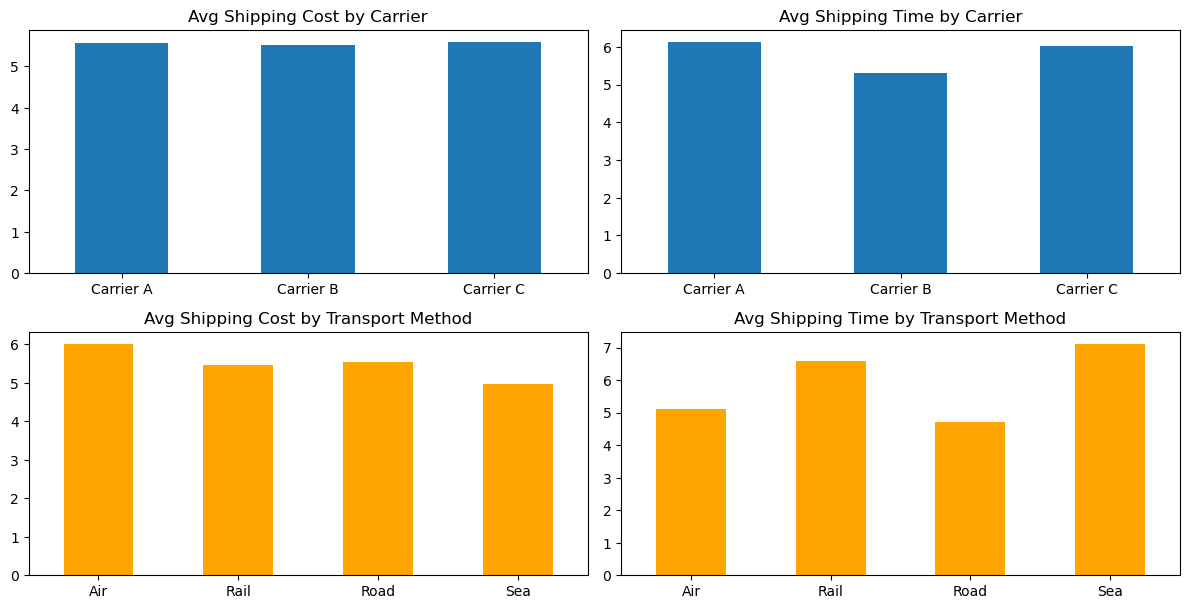

In [18]:
plt.subplot(4, 2, 1)
carriers["Shipping Costs"].mean().plot(kind = "bar", xlabel = "", rot = 0, figsize = (12,12), title = "Avg Shipping Cost by Carrier")
plt.subplot(4, 2, 2)
carriers["Shipping Times"].mean().plot(kind = "bar", xlabel = "", rot = 0, title = "Avg Shipping Time by Carrier")
plt.subplot(4, 2, 3)
transport["Shipping Costs"].mean().plot(kind = "bar", xlabel = "", rot = 0, color = "orange", title = "Avg Shipping Cost by Transport Method")
plt.subplot(4, 2, 4)
transport["Shipping Times"].mean().plot(kind = "bar", xlabel = "", rot = 0, color = "orange", title = "Avg Shipping Time by Transport Method")

plt.tight_layout()

In [34]:
transport = df.groupby(["Shipping Carriers", "Transportation Modes"])
transport.agg({"Order Quantities":"sum",
        "Shipping Costs":["sum", "mean"],
         "Shipping Times":"mean"})

Order Quantities Shipping Costs  \
                                                    sum            sum   
Shipping Carriers Transportation Modes                                   
Carrier A         Air                               298      31.236945   
                  Rail                              357      44.798820   
                  Road                              502      60.120055   
                  Sea                               182      19.382011   
Carrier B         Air                               640      87.029715   
                  Rail                              710      78.465540   
                  Road                              494      54.740011   
                  Sea                               158      16.662353   
Carrier C         Air                               403      38.197164   
                  Rail                              275      29.870382   
                  Road                              390      45.861280   
                  Sea                               513      48.450631   

                                                 Shipping Times  
                                            mean           mean  
Shipping Carriers Transportation Modes                           
Carrier A         Air                   6.247389       5.600000  
                  Rail                  6.399831       7.428571  
                  Road                  5.465460       5.181818  
                  Sea                   3.876402       7.000000  
Carrier B         Air                   6.216408       4.214286  
                  Rail                  5.231036       6.333333  
                  Road                  4.976365       4.909091  
                  Sea                   5.554118       6.666667  
Carrier C         Air                   5.456738       6.571429  
                  Rail                  4.978397       6.166667  
                  Road                  6.551611       3.714286  
                  Sea                   5.383403       7.333333

### Manufacturing
Analysis of the manufacturing suppliers. Supplier 1 is the largest manufacturing partner, also providing the lowest defect rate and lead time. Supplier 5 has the highest lead time and defect rate, along with one of the lowest production volumes. 

<Axes: title={'center': 'Percentage of Products by Supplier'}>

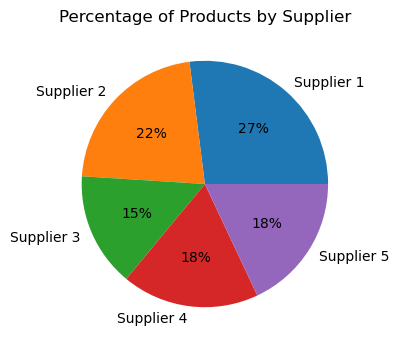

In [20]:
suppliers = df.groupby("Supplier Name")
suppliers.size().plot(kind = "pie", autopct='%1.0f%%', title = "Percentage of Products by Supplier", figsize=(4,4))

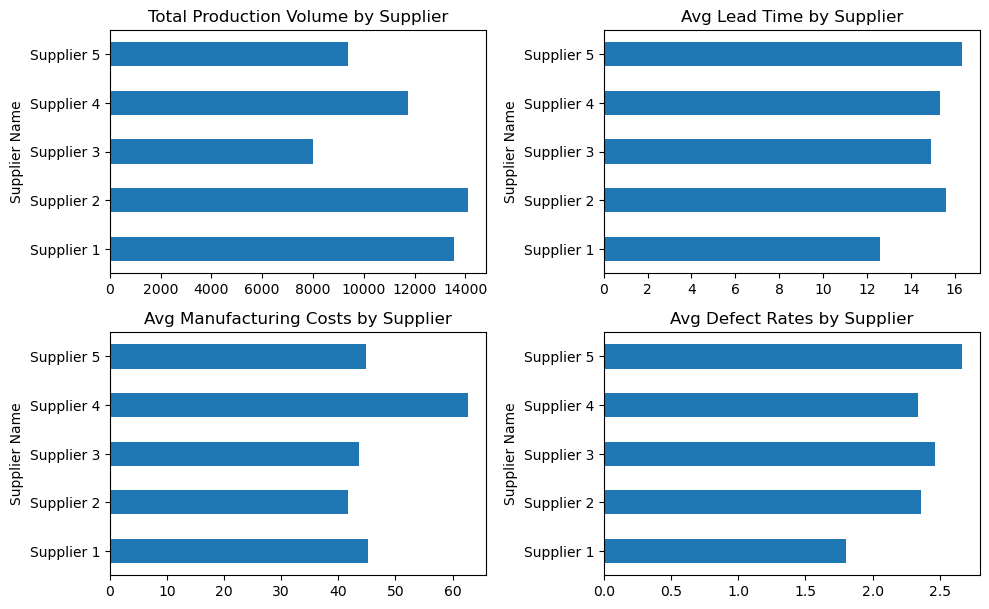

In [21]:
plt.subplot(4,2,1)
suppliers["Production Volumes"].sum().plot(kind = "barh", figsize=(10,12), title="Total Production Volume by Supplier")
plt.subplot(4,2,2)
suppliers["Manufacturing Lead Time"].mean().plot(kind = "barh", title = "Avg Lead Time by Supplier")
plt.subplot(4,2,3)
suppliers["Manufacturing Costs"].mean().plot(kind = "barh", title = "Avg Manufacturing Costs by Supplier")
plt.subplot(4,2,4)
suppliers["Defect Rates"].mean().plot(kind = "barh", title = "Avg Defect Rates by Supplier")
plt.tight_layout()

In [32]:
suppliers["Manufacturing Costs"].mean()

Supplier Name
Supplier 1    45.254027
Supplier 2    41.622514
Supplier 3    43.634121
Supplier 4    62.709727
Supplier 5    44.768243
Name: Manufacturing Costs, dtype: float64

### Share

### Conclusions
* Supplier 5 has the longest lead times, highest defect rates, and one of the lowest production volumes. The business should consider engage with this supplier to get this corrected.
* Skincare makes up 40% of the catalog and is the highest revenue category.
* Shipping carrier B has the lowest average shipping time and cost. The business should look to use this carrier more often to decrease shipping costs and provide better service. 
* Stock of items are not corresponding to demand, optimizations need to be made to lower overhead storage costs and have items ready for incoming orders.
* Shipping by sea only makes up 17% of the share of transported items despite being the cheapest method. Where shipping times are less important, look to use sea transport to lower costs.